In [401]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

Load the cleaned data

In [402]:
df = pd.read_csv('data/sales_clean.csv')
df.head(5)

,discounted_price,actual_price,discount_percentage,rating,rating_count
0,-0.604777,-0.421915,0.64,1,1.670243
1,-0.866449,0.010377,0.90,0,-0.030858
2,-0.925325,-0.800171,0.61,1,0.903649
3,-0.931867,-0.475412,0.85,0,1.732912
4,-0.895717,-0.746135,0.65,1,0.724909


In [403]:
X = df.drop('rating',axis=1).values
X

array([[-0.60477721, -0.42191545,  0.64      ,  1.67024343],
       [-0.86644865,  0.01037665,  0.9       , -0.03085835],
       [-0.92532473, -0.80017104,  0.61      ,  0.90364937],
       ...,
       [ 1.77643296,  0.64854786,  0.28      , -0.80744604],
       [ 0.70358003,  0.00551336,  0.26      , -0.02013603],
       [ 2.61901502,  0.97817058,  0.22      , -0.12881667]])

In [404]:
y = df['rating'].values
y

array([1, 0, 1, ..., 0, 1, 1])

In [405]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)


Kernel: sigmoid

              precision    recall  f1-score   support

           0       0.26      0.15      0.19        41
           1       0.61      0.65      0.63       132
           2       0.13      0.16      0.14        31

    accuracy                           0.48       204
   macro avg       0.33      0.32      0.32       204
weighted avg       0.46      0.48      0.47       204



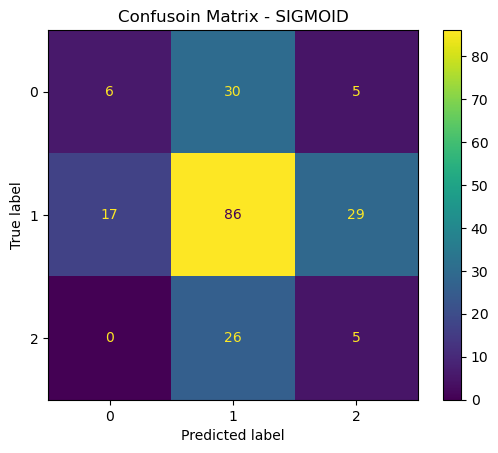

Kernel: poly

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.65      1.00      0.79       132
           2       0.00      0.00      0.00        31

    accuracy                           0.65       204
   macro avg       0.22      0.33      0.26       204
weighted avg       0.42      0.65      0.51       204



/Users/brayden/opt/anaconda3/envs/scrap/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brayden/opt/anaconda3/envs/scrap/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brayden/opt/anaconda3/envs/scrap/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

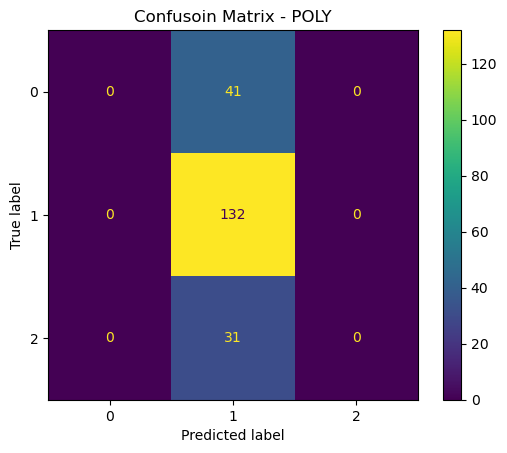

Kernel: rbf

              precision    recall  f1-score   support

           0       0.17      0.02      0.04        41
           1       0.64      0.96      0.77       132
           2       0.00      0.00      0.00        31

    accuracy                           0.63       204
   macro avg       0.27      0.33      0.27       204
weighted avg       0.45      0.63      0.51       204



/Users/brayden/opt/anaconda3/envs/scrap/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brayden/opt/anaconda3/envs/scrap/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brayden/opt/anaconda3/envs/scrap/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

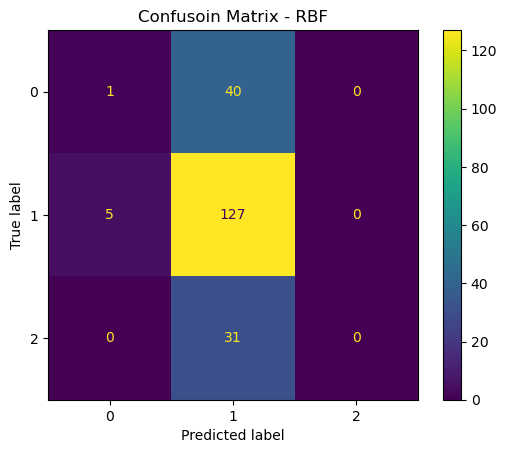

In [406]:
ker_list = ['sigmoid', 'poly', 'rbf']
for k in ker_list:
    print(f"Kernel: {k}\n")
    
    # SVM with diff kernel
    model = SVC(kernel=k, C=3, degree=4, gamma='auto')
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    # Evaluate the SVM
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels = model.classes_)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)
    disp.plot()

    plt.title('Confusoin Matrix - ' + k.upper())
    plt.savefig('img/naive_cm_' + k + '.png')
    plt.show()